# <div class="alert alert-info" style="text-align: center;" markdown="1">Cllasification</div>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Naive Bayes`

- Naive Bayes uses the probability of observing feature values given an outcome to make predictions.

- It is based on the Bayes theorem, which is used to calculate the probability of a hypothesis given our prior knowledge.

#### Conditional Probability

- The probability of an event given that another event has occurred is called conditional probability.

- The conditional probability of event A given event B is denoted by P(A|B).


P(A|B) = P(A and B) / P(B)


### Exact Naive Bayes Algorithm

1. Find all records whrere the predictor values are the same as the record to be classified.
2. Calculate the probability of each class.
3. Assign the class with the highest probability to the record.

- When number of predictor variables is large, the number of records required to make accurate predictions increases exponentially.

> Not Practical for large datasets.

### Naive Solution

1. Estimate individual probabilities for each predictor variable given the class.
2. Multiply the probabilities together and by the proportion of records in class to get the probability of the record belonging to a class.
3. Estimate the probability of the record belonging to each class and assign the class with the highest probability to the record.


$P(Y=i|X1,X2,X3,...,Xp)$

$P(Y=i|X1,X2,X3,...,Xp) = \frac{P(Y=i) * P(X_1,...,X_p|Y=i)}{P(Y=0)P(X_1,...,X_p|Y=0) + P(Y=1)P(X_1,...,X_p|Y=1)}$

$P(Y=i|X1,X2,X3,...,Xp) = \frac{P(Y=i) * P(X_1|Y=i) * ... * P(X_p|Y=i)}{P(Y=0)P(X_1|Y=0)...P(X_p|Y=0) + P(Y=1)P(X_1|Y=1)...P(X_p|Y=1)}$

In [7]:
df_loan = pd.read_csv('data/loan_data.csv.gz')
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [8]:
df_loan.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

In [9]:
predictors = ['purpose_', 'home_', 'emp_len_',]
target = 'outcome'

In [10]:
X = pd.get_dummies(df_loan[predictors], drop_first=True, prefix='', prefix_sep='')
y = df_loan[target]

In [17]:
X.shape

(45342, 9)

In [11]:
X.head(2)

,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,OWN,RENT,> 1 Year
0,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,1,1,0,1


In [16]:
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB(alpha=1.0, fit_prior=True)
model_naive.fit(X, y)

MultinomialNB()

In [18]:
new_loan = X.loc[146:146, :]
new_loan

,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,OWN,RENT,> 1 Year
146,0,0,0,0,0,1,0,0,1


In [20]:
print('Predcted Class:', model_naive.predict(new_loan))

Predcted Class: ['default']


In [23]:
probabilitites = pd.DataFrame(model_naive.predict_proba(new_loan), columns=df_loan[target].astype("category").cat.categories)
print('Predicted Probabilities:')
probabilitites

Predicted Probabilities:


,default,paid off
0,0.666796,0.333204


## `Discriminant Analysis`



### Covanriance Matrix

- The covariance matrix is a square matrix that contains the variances and covariances associated with different variables.
- The diagonal elements of the matrix contain the variances of the variables.
- The off-diagonal elements contain the covariances between the variables.


$Cov(X,Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$


### Fisher's Linear Discriminant

- If we have two groups corresponds to the record $(x_0, y_0)$ for which y = 0 and $(x_1, y_1)$ for which y = 1, the Fisher's linear discriminant method finds the linear combination $a_1x_1 + a_2x_2$ that maximizes the between-group variance relative to the within-group variance.

$\frac{SS_{between}}{SS_{within}}$

$SS_{between} = \sum_{i=1}^{n}(\bar{y}_i - \bar{y})^2$
$SS_{within} = \sum_{i=1}^{n}\sum_{j=1}^{n}(y_{ij} - \bar{y}_i)^2$

- The between-group variance is the variance of the means of the two groups.
- The within-group variance is the sum of the variances of the two groups.



In [24]:
predictors = ['borrower_score', 'payment_inc_ratio']
target = 'outcome'

X = df_loan[predictors]
y = df_loan[target]

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [26]:
pd.DataFrame(model_lda.scalings_, index=X.columns)

,0
borrower_score,6.862178
payment_inc_ratio,-0.114816


In [27]:
pred = pd.DataFrame(model_lda.predict_proba(X), columns=df_loan[target].astype("category").cat.categories)
pred.head()

,default,paid off
0,0.247468,0.752532
1,0.164256,0.835744
2,0.418215,0.581785
3,0.577558,0.422442
4,0.367282,0.632718


In [28]:
center = np.mean(model_lda.means_, axis=0)
slope = - model_lda.scalings_[0]/model_lda.scalings_[1]
intercept = center[1] - center[0] * slope

In [30]:
x_0 = (0-intercept)/slope
x_20 = (20-intercept)/slope

lda_df = pd.concat([df_loan, pred["default"]], axis=1)
lda_df.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score,default
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65,0.247468
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80,0.164256
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,2,6.0,default,1,other,RENT,> 1 Year,0.60,0.418215
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50,0.577558
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,14,5.4,default,4,other,RENT,> 1 Year,0.55,0.367282


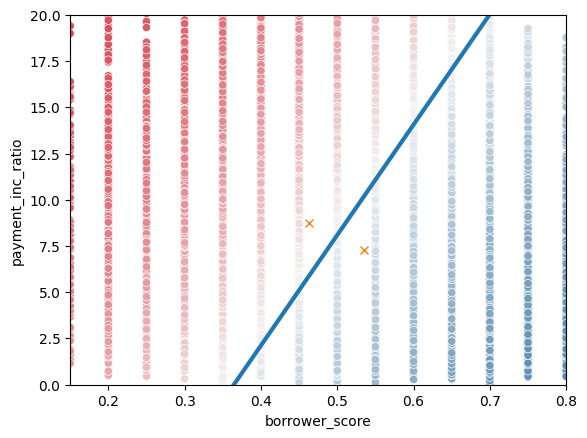

In [32]:
fig ,ax = plt.subplots()
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, ax=ax, legend=False, palette=sns.diverging_palette(240, 10, n=9, as_cmap=True))
ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot([x_0, x_20], [0, 20], linewidth=3)
ax.plot(*model_lda.means_.T, 'x')
plt.show()

## `Logistic Regression`

- Logistic regression is a classification algorithm that is used to predict the probability of a categorical dependent variable.

**$P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p)}}$**

#### Odds

- The odds of an event is the ratio of the probability of the event occurring to the probability of the event not occurring.

$Odds = \frac{P(Y=1|X)}{1 - P(Y=1|X)}$

$P = \frac{Odds}{1 + Odds}$

$Odds = e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p}$

#### Log Odds

- The log odds is the natural logarithm of the odds.

$log(Odds) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

In [34]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
target = 'outcome'

In [35]:
X = pd.get_dummies(df_loan[predictors], drop_first=True, prefix='', prefix_sep='')
y = df_loan[target]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_logit = LogisticRegression()
model_logit.fit(X, y)

/home/rishabh/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = model_logit.predict(X)
accuracy_score(y, y_pred)

0.6364739093996736

### Logistic Regression and The Generalized Linear Model (GLM)

- Logistic regression is a type of generalized linear model (GLM) that uses the logit link function.

In [38]:
model_logit = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model_logit.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

### Predicted Values from Logistic Regression

**$\hat{P} = \frac{1}{1 + e^{-(\gamma)}}$**

In [42]:
log_prob = pd.DataFrame(model_logit.predict_log_proba(X), columns=df_loan[target].astype("category").cat.categories)
log_prob.describe()

,default,paid off
count,45342.000000,45342.000000
mean,-0.757850,-0.760423
std,0.378032,0.390419
min,-2.768873,-3.538865
25%,-0.985728,-0.977164
50%,-0.697366,-0.688946
75%,-0.472209,-0.467076
max,-0.029476,-0.064787


In [44]:
prob = pd.DataFrame(model_logit.predict_proba(X), columns=df_loan[target].astype("category").cat.categories)
prob.head()

,default,paid off
0,0.242502,0.757498
1,0.314407,0.685593
2,0.516627,0.483373
3,0.588000,0.412000
4,0.458618,0.541382


#### ODDS Ratio for a binary variable

$odds ratio = \frac{odds(Y = 1|X = 1)}{odds(Y = 1|X = 0)}$

### Maximum Likelihood Estimation

- The maximum likelihood estimation is a method used to estimate the parameters of a model by maximizing the likelihood function.

- The likelihood function is the probability of observing the data given the parameters of the model.

$P(Y|X) = \prod_{i=1}^{n}P(Y_i|X_i)$

$ deviance = -2\sum_{i=1}^{n}y_ilog(\hat{p}_i) + (1-y_i)log(1-\hat{p}_i)$

## `Assessing The Model`

In [49]:
import statsmodels.api as sm

y_nums = [1 if yi == 'default' else 0 for yi in y]
model_logit_sm = sm.GLM(y_nums, X.assign(const=1), family=sm.families.Binomial())
result = model_logit_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Sun, 28 Jul 2024   Deviance:                       57515.
Time:                        14:08:14   Pearson chi2:                 4.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1112
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0.002     32.058      0.000       0.075       0.085
borrower_score        -4.6126      0.084    -55.203      0.000      -4.776      -4.449
debt_consolidation     0.2494      0.028      9.030      0.000       0.195       0.303
home_improvement       0.4077      0.047      8.747      0.000       0.316       0.499
major_purchase         0.2296      0.054      4.277      0.000       0.124       0.335
medical                0.5105      0.087      5.882      0.000       0.340       0.681
other                  0.6207      0.039     15.738      0.000       0.543       0.698
small_business         1.2153      0.063     19.192      0.000       1.091       1.339
OWN                    0.0483      0.038      1.271      0.204      -0.026       0.123
RENT                   0.1573      0.021      7.420      0.000       0.116       0.199
 > 1 Year             -0.3567      0.053     -6.779      0.000      -0.460      -0.254
const                  1.6381      0.074     22.224      0.000       1.494       1.783
======================================================================================
"""

In [51]:
import statsmodels.formula.api as smf
formula = ('outcome ~ bs(payment_inc_ratio, df=8) + purpose_ + ' +
           'home_ + emp_len_ + bs(borrower_score, df=3)')
model = smf.glm(formula=formula, data=df_loan, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['outcome[default]', 'outcome[paid off]']   No. Observations:                45342
Model:                                                   GLM   Df Residuals:                    45321
Model Family:                                       Binomial   Df Model:                           20
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -28731.
Date:                                       Sun, 28 Jul 2024   Deviance:                       57462.
Time:                                               14:08:41   Pearson chi2:                 4.54e+04
No. Iterations:                                            6   Pseudo R-squ. (CS):             0.1122
Covariance Type:                                   nonrobust                      

### Analysis of Residuals

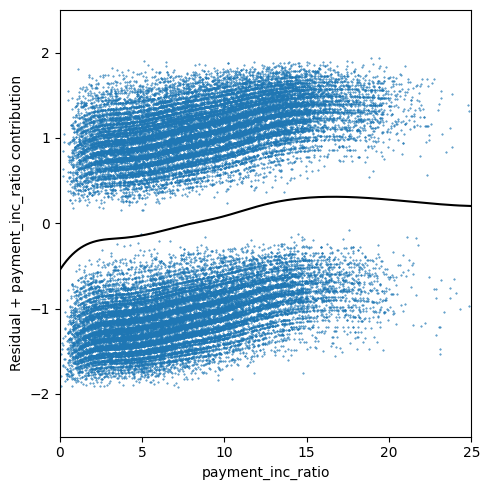

In [52]:
from statsmodels.genmod.generalized_linear_model import GLMResults

def partialResidualPlot(model, df, outcome, feature, fig, ax):
    y_actual = [0 if s == 'default' else 1 for s in df[outcome]]
    y_pred = model.predict(df)
    org_params = model.params.copy()
    zero_params = model.params.copy()
    # set model parametes of other features to 0
    for i, name in enumerate(zero_params.index):
        if feature in name:
            continue
        zero_params[i] = 0.0
    model.initialize(model.model, zero_params)
    feature_prediction = model.predict(df)
    ypartial = -np.log(1/feature_prediction - 1)
    ypartial = ypartial - np.mean(ypartial)
    model.initialize(model.model, org_params)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': -2 * (y_actual - y_pred),
        'ypartial': ypartial/ 2,
    })
    results = results.sort_values(by=['feature'])

    ax.scatter(results.feature, results.residual, marker=".", s=72./fig.dpi)
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(results, df_loan, 'outcome', 'payment_inc_ratio', fig, ax)
ax.set_xlim(0, 25)
ax.set_ylim(-2.5, 2.5)


plt.tight_layout()
plt.show()

## `Evaluating The Classification Models`

### Confusion Matrix

- A confusion matrix is a table that is used to evaluate the performance of a classification model.

- The confusion matrix contains the actual and predicted classes.

- The confusion matrix is used to calculate the accuracy, precision, recall, and F1 score of a classification model.

| Actual\Predicted |    1   |    0   |
|------------------|--------|--------|
| 1                | 5 (TP) | 1 (FN) |
| 0                | 2 (FP) | 4 (TN) |


### Accuracy

- The accuracy of a classification model is the proportion of correctly classified records.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

### Precision

- The precision of a classification model is the proportion of correctly classified positive records.

$Precision = \frac{TP}{TP + FP}$

### Recall

- The recall of a classification model is the proportion of positive records that are correctly classified.

$Recall = \frac{TP}{TP + FN}$

### Specificity

- The specificity of a classification model is the proportion of negative records that are correctly classified.

$Specificity = \frac{TN}{TN + FP}$

### F1 Score

- The F1 score is the harmonic mean of the precision and recall.

$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$

In [53]:
pred = model_logit.predict(X)
pred_y = model_logit.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
false_pos = ~true_y & pred_y
true_neg = ~true_y & ~pred_y
false_neg = true_y & ~pred_y

confusion_matrix = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
                                 [np.sum(false_pos), np.sum(true_neg)]],
                                columns=['Y_pred = default', 'Y_pred = paid off'],
                                index=['Y = default', 'Y = paid off'])
confusion_matrix

,Y_pred = default,Y_pred = paid off
Y = default,14336,8335
Y = paid off,8148,14523


In [57]:
print("Precision:", confusion_matrix.iloc[0, 0] / sum(confusion_matrix.iloc[:, 0]))
print("Recall:", confusion_matrix.iloc[0, 0] / sum(confusion_matrix.iloc[0, :]))
print("Specificity:", confusion_matrix.iloc[1, 1] / sum(confusion_matrix.iloc[1, :]))

Precision: 0.6376089663760897
Recall: 0.6323496978518812
Specificity: 0.6405981209474659


### ROC Curve

- The ROC curve is a graphical representation of the (recall/sensitivity) versus the specificity.

- The ROC curve shows the trade-off between the recall/sensitivity and the specificity.



In [58]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y, model_logit.predict_proba(X)[:, 0], pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
roc_df.head()

,recall,specificity
0,0.000000,1.000000
1,0.000044,1.000000
2,0.000132,1.000000
3,0.000132,0.999956
4,0.000265,0.999956


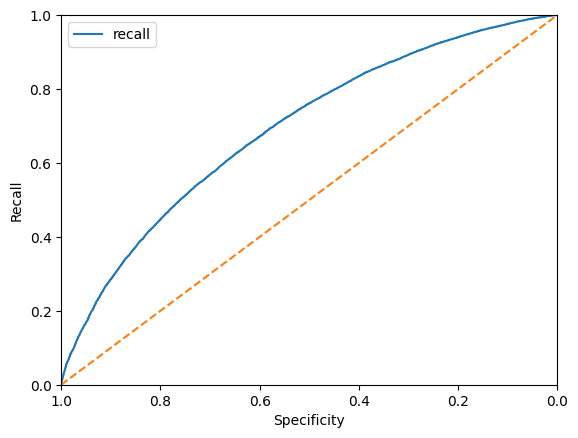

In [59]:
fig, ax = plt.subplots()
roc_df.plot(x='specificity', y='recall', ax=ax)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot([1, 0], [0, 1], linestyle='--')
ax.set_xlabel('Specificity')
ax.set_ylabel('Recall')
plt.show()

### AUC (Area Under the Curve)

- The AUC is the area under the ROC curve.


In [62]:
from sklearn.metrics import roc_auc_score


print(np.sum(roc_df.recall[:-1] * np.diff(1-roc_df.specificity)))
print(roc_auc_score([1 if yi == "default" else 0 for yi in y], model_logit.predict_proba(X)[:,0]))

0.691710795288669
0.6917108731135808


### Lift

- The Lift curve is the ratio of the cumulative gains to the diagonal line corresponding to random selection.

## `Strategies for Imbalanced Data`

### Under Sampling

- Under sampling is a technique used to balance the classes in a dataset by reducing the number of records in the majority class.

In [63]:
df_loan.outcome.value_counts(normalize=True)*100

default     50.0
paid off    50.0
Name: outcome, dtype: float64

### Over Sampling

- Over sampling is a technique used to balance the classes in a dataset by increasing the number of records in the minority class.
- We can get same effect by applying weights to the data.

In [64]:
default_weight = 1 / np.mean(df_loan.outcome == 'default')
wt = [default_weight if yi == 'default' else 1 for yi in df_loan.outcome]

model_logit_weighted = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model_logit_weighted.fit(X, y, sample_weight=wt)


LogisticRegression(C=1e+42, solver='liblinear')

In [65]:
print("Percentage of loans predicted to default:", np.mean(model_logit_weighted.predict(X) == 'default') * 100)

Percentage of loans predicted to default: 81.9218384720568


### Data Generation

- Data generation is a technique used to balance the classes in a dataset by generating synthetic records for the minority class.


### SMOTE (Synthetic Minority Over-sampling Technique)

- The SMOTE algorithm finds a record similar to the record being upsampled and creates a new record that is randomly weighted average of the original record and the neighbor record.



### Cost-Based Classification

- Cost-based classification is a technique used to balance the classes in a dataset by assigning different costs to the classes.

- If the expected cost of a default of a new loan is C and the expected return from paid off is R, then the expected return from the loan is:

$E = R * P(Y=0) + C * P(Y=1)$